# Emotionally Aware Chatbot
Emotion is one of the basic instincts of a human being. Emotion detection plays a vital role in the field of textual analysis. At present, people’s expressions and emotional states have turned into the leading topic for research works. Emotion Detection and Recognition from texts are recent fields of research that are closely related to Emotion Analysis. Emotion Analysis aims at detecting and recognizing feelings through the expressions from sentences, such as *anger*, *surprise*, *joy*, *fear*, *sadness*, *love*, *neutral* etc.



In [ ]:
pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Text Libraries
import nltk
import string
import re

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier

# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# other
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

# Drive Mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1. Dataset

In [ ]:
df = pd.read_csv('/content/text_emotions_neutral.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
24995,Yeah. Did you know that in Nevada there is a...,Neutral
24996,"I wonder why, not many have had facial hair a...",Neutral
24997,"That is sad, it is bad that we really wind up...",Neutral
24998,Same here. Since 1900 the taller candidate h...,Neutral


In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']

Dataset size: (25000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


## Dataset Emotion Analysis

<Axes: xlabel='sentiment', ylabel='count'>

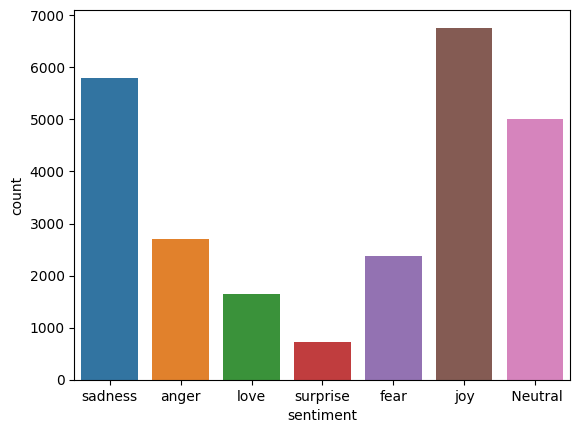

In [ ]:
sns.countplot(x = 'sentiment', data = df)

## Emotion Frequency

In [ ]:

import collections
counter=collections.Counter(df['sentiment'])
counter

Counter({'sadness': 5798,
         'anger': 2709,
         'love': 1641,
         'surprise': 719,
         'fear': 2373,
         'joy': 6760,
         ' Neutral': 5000})

In [ ]:
Emotions = df['sentiment'].unique()
Emotions

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy', ' Neutral'],
      dtype=object)

# 2. Pre-processing text data
1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

## 2.1 Remove Punctuations

In [ ]:
emojis = pd.read_csv('/content/emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


## 2.2 Tokenization

In [ ]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)

    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


## 2.3 Remove Stopwords

In [ ]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im',''])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


## 2.4 Lemmatization

In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


## Token Frequency in a sentence after preprocessing

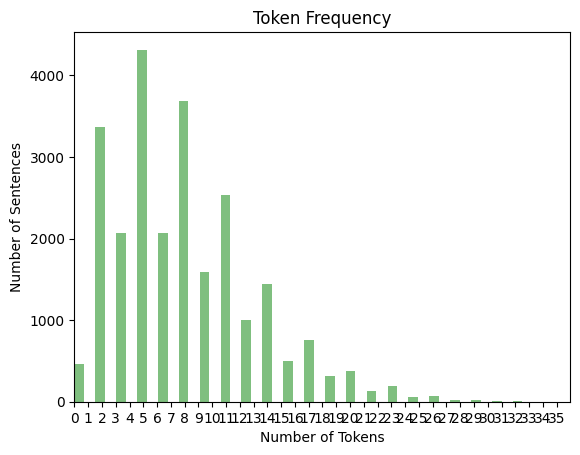

In [ ]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)]
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

## All in one (Text preprocessing)

In [ ]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# 3. Feature Extraction
1. Count Vectorizer
2. TF-IDF (Term Frequency and Inverse Document Frequency)

## 3.1 Count Vectorizer
**CountVectorizer** is a great tool provided by the *scikit-learn* library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).
    
Let us consider a few sample texts from a document:
    
    document 1: Time flies flies like an arrow.
    document 2: Fruit flies like a banana.

    
**CountVectorizer** creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

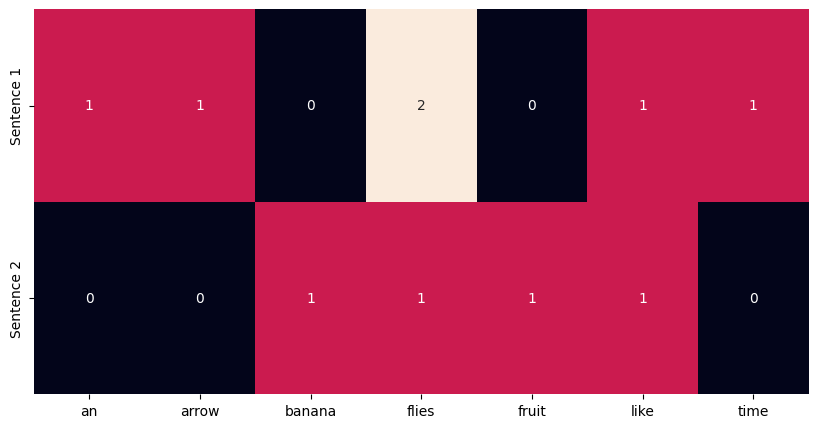

In [ ]:
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

## 3.2 TF-IDF

### 3.2.1 **Term Frequency (TF)**
Term Frequent (**TF**) is a measure of how frequently a term, $t$, appears in a document, $d$:



$$TF_{t,d} = \frac{n_{t,d}}{\text{Total number of terms in document}\ d }$$



$n_{t,d}$ = Number of times term $t$ appears in a document $d$. Thus, each document and term would have its own **TF** value.

Consider these 3 documents:-

- It was the best of the time.
- it was the worst of Times.
- it is the time of stupidity.

The vocabulary or dictionary of the entire corpus would be:-

1. it
2. was
3. the
4. best
5. of
6. time
7. worst
8. is
9. stupidity

Now we will calculate the **TF** values for the **Document 3**.

Document 3 :- **it is the time of stupidity.**

- Number of words in Document 3 = **6**
- TF for the word **‘the’** = (number of times **‘the’** appears in Document 3) / (number of terms in Document 3) = **1/6**

Likewise:-

- TF(**'it'**) = 1/6
- TF(**'was'**) = 0/6 = 0
- TF(**'the'**) = 1/6
- TF(**'best'**) = 0/6 = 0
- TF(**'of'**) = 1/6
- TF(**'time'**) = 1/6
- TF(**'worst'**) = 0/6 = 0
- TF(**'is'**) = 1/6
- TF(**'stupidity'**) = 1/6

We can calculate all the term frequencies for all the terms of all the documents in this manner:-

|    Term   | Document#1 | Document#2 | Document#3 | TF (Document#1) | TF (Document#2) | TF (Document#3) |
|:---------:|:----------:|:----------:|:----------:|:---------------:|:---------------:|:---------------:|
|     it    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    was    |      1     |      1     |      0     |       1/7       |       1/6       |        0        |
|    the    |      2     |      1     |      1     |       2/7       |       1/6       |       1/6       |
|    best   |      1     |      0     |      0     |       1/7       |        0        |        0        |
|     of    |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|    time   |      1     |      1     |      1     |       1/7       |       1/6       |       1/6       |
|   worst   |      0     |      1     |      0     |        0        |       1/6       |        0        |
|    is     |      0     |      0     |      1     |        0        |        0        |       1/6       |
| stupidity |      0     |      0     |      1     |        0        |        0        |       1/6       |







### 3.2.2 **Inverse Document Frequency (IDF)**

IDF is a measure of how important a term is. We need the IDF value because computing just the **TF alone is not sufficient** to understand the importance of words:



$$IDF_{t} = log \ (\frac{\text{Total Number of Documents}}{\text{The Number of Documents with Term $t$}})$$



A problem with scoring word frequency is that highly frequent words **(‘is’, ‘the’, ‘a’ etc)** start to dominate in the document (e.g. larger score), but may not contain as much **“useful information”** to the model comapre to the rarer but **domain specific words**.


One approach is to rescale the frequency of words by **how often they appear in all documents**, so that the scores for frequent words like “the” that are also frequent **across all documents are penalized**.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF for short, where:

- **Term Frequency:** is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency:** is a scoring of how rare the word is across documents.

**Thus the idf of a rare term is high, whereas the idf of a frequent term is likely to be low.**

We can calculate the IDF values for **Document 3**:

Document 3 :- **it is the time of stupidity.**

IDF(**‘it’**) =  log(total number of documents/number of documents containing the word **‘it’**) = log(3/3) = log(1) = 0

IDF(**‘stupidity’**) =  log(total number of documents/number of documents containing the word **‘stupidity’**) = log(3/1) = log(3) = 0.48

We can calculate the IDF values for each word like this. Thus, the IDF values for the entire vocabulary would be:

|    Term   | Document#1 | Document#2 | Document#3 |  IDF |
|:---------:|:----------:|:----------:|:----------:|:----:|
|     it    |      1     |      1     |      1     | 0.00 |
|    was    |      1     |      1     |      0     | 0.18 |
|    the    |      2     |      1     |      1     | 0.00 |
|    best   |      1     |      0     |      0     | 0.48 |
|     of    |      1     |      1     |      1     | 0.00 |
|    time   |      1     |      1     |      1     | 0.00 |
|   worst   |      0     |      1     |      0     | 0.48 |
|    is     |      0     |      0     |      1     | 0.48 |
| stupidity |      0     |      0     |      1     | 0.48 |

\

We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:

$$(TF-IDF)_{t,d} = TF_{t,d} * IDF_{t}$$


You can find the overall summary in the following figure.

<div align="center">
<img src="https://drive.google.com/uc?id=1Xw5RlK_RxYtZEQtpFNaePXnJNyQmLcn1" width="680" height="230">
</div>



We can now calculate the TF-IDF score for every word in **Document 3**:

Document 3 :- **it is the time of stupidity.**

TF-IDF(‘it’, Document 3) = TF(‘it’, Document 3) * IDF(‘it’) = 1/6 * 0 = 0

Likewise:-

- TF(**'it'**) = (1/6) * 0 = 0
- TF(**'is'**) = (1/6) * 0.48 = 0.08
- TF(**'the'**) = (1/6) * 0 = 0
- TF(**'best'**) = (0/6) * 0.48 = 0
- TF(**'time'**) = (1/6) * 0 = 0
- TF(**'of'**) = (1/6) * 0 = 0
- TF(**'stupidity'**) = (1/6) * 0.48 = 0.08

Similarly, we can calculate the TF-IDF scores for all the words with respect to all the documents.

- First, notice how if there is a very common
word that occurs in all documents (i.e., n = N), IDF(w) is 0 and the TF­IDF score is 0, thereby
completely penalizing that term.
- Second, if a term occurs very rarely, perhaps in only one document,
the IDF will be the maximum possible value, log N


[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

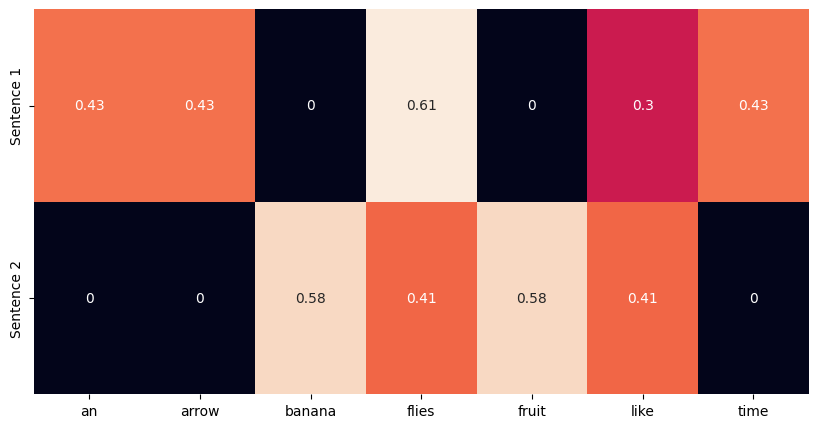

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

#### Train Test Split (70-30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.25, random_state = 116)

In [ ]:
X_train

15398    i was feeling pretty overwhelmed and stressed ...
21735     I agree totally, tailoring is not worth it at...
16509    i feel so heartbroken over paul walker s tragi...
20696     True, some of them look a bit out of practice...
14919     i get the feeling that hes not impressed with me
                               ...                        
4994     i dont know if its easier to have a mental ill...
10286    i feel like i did when i was learning to use g...
5169                              im feeling very listless
15803    i had climbed on a cherry tree alone and there...
3381     i hear the word and i feel stronger and re ass...
Name: content, Length: 18750, dtype: object

In [ ]:
# Use LabelEncoder to encode string labels to numerical form
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

In [ ]:
x_train

<18750x15116 sparse matrix of type '<class 'numpy.float64'>'
	with 154758 stored elements in Compressed Sparse Row format>

##  Bert


In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['sentiment'].unique()))

# Tokenize and prepare data
def tokenize_data(texts, labels):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_text = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=64,  # Adjust as needed
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf'  # Use TensorFlow tensors
        )

        input_ids.append(encoded_text['input_ids'])
        attention_masks.append(encoded_text['attention_mask'])

    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)
    labels = tf.constant(labels)

    return tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids, 'attention_mask': attention_masks}, labels))

train_dataset = tokenize_data(X_train, y_train_encoded)
test_dataset = tokenize_data(X_test, y_test_encoded)


# Training parameters
batch_size = 16
epochs = 3
learning_rate = 2e-5

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model.fit(train_dataset.batch(batch_size), epochs=epochs)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size))
print('Accuracy:', '{:.2%}'.format(test_accuracy))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/3
1172/1172 [==============================] - 321s 230ms/step - loss: 0.4571 - accuracy: 0.8488
Epoch 2/3
1172/1172 [==============================] - 270s 230ms/step - loss: 0.1148 - accuracy: 0.9528
Epoch 3/3
391/391 [==============================] - 36s 84ms/step - loss: 0.1390 - accuracy: 0.9400
Accuracy: 94.00%


In [ ]:
# Specify the path where you want to save the model
model_save_path = '/content/drive/MyDrive/bert_model_new'
# Save the model
model.save_pretrained(model_save_path)

In [ ]:
# Specify the path where you want to save the model
model_save_path = '/content/drive/MyDrive/tokenize'
# Save the tokenizer
tokenizer.save_pretrained(model_save_path)


('/content/drive/MyDrive/tokenize/tokenizer_config.json',
 '/content/drive/MyDrive/tokenize/special_tokens_map.json',
 '/content/drive/MyDrive/tokenize/vocab.txt',
 '/content/drive/MyDrive/tokenize/added_tokens.json')

In [ ]:
# Make predictions
predictions = model.predict(test_dataset.batch(batch_size))
predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()

# Use label_encoder to transform y_test labels
y_test_encoded = label_encoder.transform(y_test)

# Evaluation metrics
print(classification_report(y_test_encoded, predicted_labels))


391/391 [==============================] - 37s 85ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       0.97      0.89      0.93       662
           2       0.87      0.94      0.91       595
           3       0.93      0.95      0.94      1745
           4       0.77      0.84      0.80       397
           5       0.97      0.95      0.96      1434
           6       0.92      0.72      0.81       174

    accuracy                           0.94      6250
   macro avg       0.92      0.90      0.91      6250
weighted avg       0.94      0.94      0.94      6250



In [ ]:
import numpy as np

# Replace this with the text you want to test
new_text = "My gf is dead"

# Tokenize and prepare the new text
def tokenize_text(text):
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,  # Adjust as needed
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'  # Use TensorFlow tensors
    )
    return {'input_ids': encoded_text['input_ids'], 'attention_mask': encoded_text['attention_mask']}

# Tokenize the new text
new_text_data = tokenize_text(new_text)

# Make predictions on the new text
new_text_predictions = model.predict(new_text_data)
new_text_predicted_label = np.argmax(new_text_predictions.logits, axis=1).item()

# Map the numerical label back to the original emotion category
predicted_emotion = label_encoder.inverse_transform([new_text_predicted_label])[0]

# Print the resulta
print(f"Predicted Emotion: {predicted_emotion}")


1/1 [==============================] - 3s 3s/step
Predicted Emotion: sadness


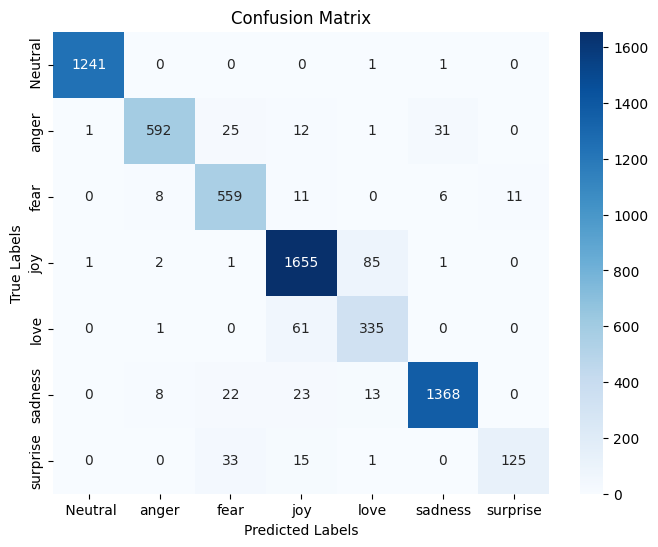

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create confusion matrix
cm = confusion_matrix(y_test_encoded, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
